# Init

In [1]:
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pathlib import Path
%cd ..
%load_ext autoreload

c:\Users\kepes\Projects\segmentation


In [2]:
%autoreload 2
from src.MapData import MapData
from src.LineFinder import LineFinder

from src.plotting_functions import plot_embedding, plot_single_variable_map

# Dataset

In [3]:
# map_data = MapData('./data/Rakoviny/P39B/2022_06_07_P39B_616x519.libsdata')
map_data = MapData('./data/2022_03_22_P56B_307x532.libsdata')
map_data.get_metadata()
map_data.load_wavelenths()
map_data.load_all_data()
map_data.get_map_dimensions()
map_data.trim_spectra(64)

In [4]:
map_data.spectra = np.load(file='./temp/P56B/preprocessed.npy')
map_data.wvl = map_data._upsample_wvl(map_data.wvl)

In [14]:
maxima_spectrum = map_data.spectra.max(axis=0)

line_finder = LineFinder(
    maxima_spectrum,
    map_data.wvl,
    name='maxima'
)
line_finder.find_lines(
    height=150,
    threshold=None,
    distance=None,
    prominence=50,
    width=3,
    wlen=35,
    rel_height=1.2,
)
line_finder.load_nist_tables(
    # Path('D:/OneDrive - Vysoké učení technické v Brně/projects/marsData/inventory/nistTables')
    Path('C:/Users/kepes/OneDrive - Vysoké učení technické v Brně/projects/marsData/inventory/nistTables')
)
line_finder.find_peaks_in_reference(
    maxima_spectrum, 
    scale=False,
    show_cond=False
)

line_finder.plot.show()

creating base plot


In [ ]:
map_data.get_baseline(50,100)
map_data.baseline_correct()

In [16]:
def min_max_dist(arr: np.array, axis: int = 1) -> np.array:
    return np.max(arr,axis=axis) - np.min(arr,axis=axis)

def get_triangular_kernel(size: int) -> np.array:
    return np.concatenate((np.arange(1, size), np.arange(size, 0, -1))) / size    

def triangle_corr(arr: np.array, axis: int = 1) -> np.array:
    size = np.ceil(arr.shape[1] / 2)
    kernel = get_triangular_kernel(int(size))
    kernel = np.interp(
        np.linspace(0, len(kernel), num=arr.shape[1]),
        np.arange(len(kernel)),
        get_triangular_kernel(size)
    )

    return np.apply_along_axis(
        func1d=lambda row: np.corrcoef(row,kernel)[0,1],
        arr=arr,
        axis=1
    )

In [17]:
map_data.get_emission_line_intensities(
    line_finder.peaks[1].get('left_bases'),
    line_finder.peaks[1].get('right_bases'),
    line_centers=line_finder.peaks[0],
    intensity_funcs=[np.max,np.sum,min_max_dist,triangle_corr]
)

## Line ratios

In [18]:
line_ratios = dict()
for ref_line in map_data.line_intensities:
    line_ratios[f'div_by_{ref_line}'] = {
        f'{line}/{ref_line}':np.divide(
            intensities,
            map_data.line_intensities.get(ref_line),
        )
        for line,intensities
        in map_data.line_intensities.items()
        if ref_line != line
    }

TypeError: unsupported operand type(s) for /: 'dict' and 'dict'

In [ ]:
for normalization_id in line_ratios:
    for line,intensities in line_ratios[normalization_id].items():
        file_name = "P56B/{}/line_max_{}_nm".format(
            normalization_id.replace('.','_'),
            line.replace('.','_').replace('/','by')
        )
        print(file_name)
        if not Path('./temp').joinpath(file_name).parent.exists():
            Path('./temp').joinpath(file_name).parent.mkdir(parents=True)
        plot_single_variable_map(
            plot_values=map_data.vector_to_array(intensities),
            file_id=file_name,
            figure_title=f'{line} nm',
            colorbar_title='Intensity',
            fig_size_scaling=3.,
            cutoff_quantile=.99
        )

        plt.close()

In [19]:
for intensity_func in map_data.line_intensities:
    for line,intensities in map_data.line_intensities[intensity_func].items():
        file_name = f"P56B/denoised/intensityMaps/{intensity_func}_{line.replace('.','_')}_nm"
        if not Path('./temp').joinpath(file_name).parent.exists():
            Path('./temp').joinpath(file_name).parent.mkdir(parents=True)
        print(file_name)
        plot_single_variable_map(
            plot_values=map_data.vector_to_array(intensities),
            file_id=file_name,
            figure_title=f'{line} nm',
            colorbar_title='Intensity',
            fig_size_scaling=3.,
            cutoff_quantile=.99
        )

        plt.close()

P56B/denoised/intensityMaps/amax_245_51_nm


c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:192: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



P56B/denoised/intensityMaps/amax_247_03_nm
P56B/denoised/intensityMaps/amax_247_96_nm
P56B/denoised/intensityMaps/amax_249_20_nm
P56B/denoised/intensityMaps/amax_251_25_nm
P56B/denoised/intensityMaps/amax_252_30_nm
P56B/denoised/intensityMaps/amax_260_70_nm
P56B/denoised/intensityMaps/amax_262_95_nm
P56B/denoised/intensityMaps/amax_263_31_nm
P56B/denoised/intensityMaps/amax_263_71_nm
P56B/denoised/intensityMaps/amax_264_44_nm
P56B/denoised/intensityMaps/amax_264_76_nm
P56B/denoised/intensityMaps/amax_266_08_nm
P56B/denoised/intensityMaps/amax_268_05_nm
P56B/denoised/intensityMaps/amax_268_25_nm
P56B/denoised/intensityMaps/amax_268_58_nm
P56B/denoised/intensityMaps/amax_269_34_nm
P56B/denoised/intensityMaps/amax_271_67_nm
P56B/denoised/intensityMaps/amax_279_63_nm
P56B/denoised/intensityMaps/amax_280_31_nm
P56B/denoised/intensityMaps/amax_283_73_nm
P56B/denoised/intensityMaps/amax_285_30_nm
P56B/denoised/intensityMaps/amax_292_13_nm
P56B/denoised/intensityMaps/amax_293_33_nm
P56B/denois

## Alternative line intensity calculations

In [52]:
my_func = np.max
print(my_func.__name__)

amax


# Embedding 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

embeddings = dict()

In [ ]:
pca_model = PCA(3)
embeddings['pca'] = pca_model.fit_transform(
    pd.DataFrame(map_data.line_intensities)
)

tsne_model = TSNE(
    n_components=3,
    perplexity=30,
    learning_rate=200
)
embeddings['tsne'] = tsne_model.fit_transform(
    pd.DataFrame(map_data.line_intensities)
)

umap_model = UMAP(n_components=3, n_neighbors=30, min_dist=0.5)
embeddings['umap'] = umap_model.fit_transform(
    pd.DataFrame(map_data.line_intensities)
)

In [ ]:
embedding_method = 'tsne'

fig = plot_embedding(
    embeddings[embedding_method],
    # explained_variances=pca_model.explained_variance_ratio_.copy(),
    # colors=predicted_labels[clustering_method],
    marker_size=2,
    return_figure=True
)
# fig.suptitle(clustering_method)
fig.patch.set_alpha(0)
fig.tight_layout()
# fig.savefig(
#     f'./temp/{embedding_method}_embeddings_full_spectra_clustering_using_{clustering_method}_{segment}',
#     transparent=True
# )

## Saving models

In [ ]:
from joblib import dump

dump(pca_model, './temp/pca_model.joblib')
dump(tsne_model, './temp/tsne_model.joblib')
dump(umap_model, './temp/umap_model.joblib')

In [ ]:
from joblib import load
pca_model = load('../temp/pca_model.joblib')

## Saving embedded data

In [ ]:
np.save(file='./temp/embeddings_pca.npy', arr=embeddings['pca'])
np.save(file='./temp/embeddings_tsne.npy', arr=embeddings['tsne'])
np.save(file='./temp/embeddings_umap.npy', arr=embeddings['umap'])

## Loading saved data

In [ ]:
embedding = np.load(file='./temp/embeddings_pca.npy')
plot_data = map_data.vector_to_array(embedding[:,2])
plot_single_variable_map(
    plot_data
)

# Edge detection

In [9]:
import cv2

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:192: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



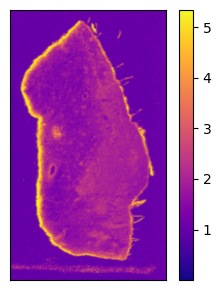

In [18]:
edge_data = map_data.vector_to_array(line_ratios['div_by_280.32']['393.33/280.32'].copy())
plot_single_variable_map(edge_data)
# edge_data = plot_data.copy()

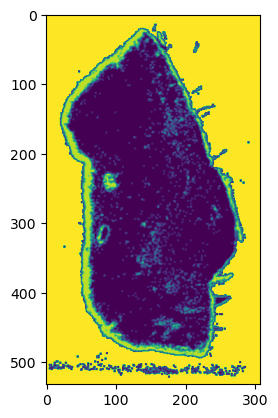

In [37]:
edge_data -= edge_data.min()
edge_data /= edge_data.max()
edge_data *= 255
edge_data = edge_data.astype(np.uint8)

th, im_th = cv2.threshold(
    edge_data, 
    30,
    230,
    cv2.THRESH_BINARY
)
plt.imshow(im_th)
 
# Copy the thresholded image.
im_floodfill = im_th.copy()

im_floodfill = cv2.filter2D(
    im_floodfill, 
    -1, 
    np.ones(shape=(3,3))/9
)
 
# # Mask used to flood filling.
# # Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# # Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
plt.imshow(im_floodfill)

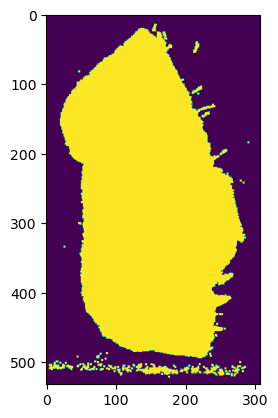

In [39]:
plt.imshow(im_floodfill != 255)

### Discontinued

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:192: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



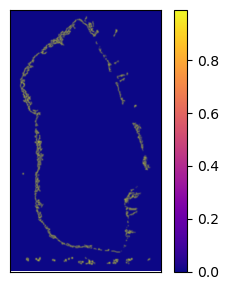

In [123]:
# TODO fit the coordinates of the edges with a polynomial to fill in the gaps
prev_left_ndx = 0
prev_right_ndx = -1

plot_data = edge_image.astype(np.int32)

for slice_ndx in range(plot_data.shape[0]):
    edges = LineFinder(
        plot_data[slice_ndx,:] - plot_data[slice_ndx,:].min(),
        wvl=np.arange(plot_data.shape[1]),
        name=f'hslice {slice_ndx}'
    )
    edges.create_base_plot()    
    edges.find_lines(
        height=edges.spectrum.max()*.5,
        # prominence=.9,
        # wlen=7
    )
    # print(edges.peaks)
    if len(edges.peaks[0]) >= 2:
        current_left_ndx = edges.peaks[0][0]
        current_right_ndx = edges.peaks[0][-1]
    elif len(edges.peaks[0]) <= 1:
        current_left_ndx = prev_left_ndx
        current_right_ndx = prev_right_ndx
        # current_left_ndx = np.min([
        #     edges.peaks[0][0],
        #     prev_left_ndx
        # ])
        # current_right_ndx = np.max([
        #     edges.peaks[0][-1],
        #     prev_right_ndx
        # ])

    try:
        plot_data[slice_ndx,:current_left_ndx] = 0
        plot_data[slice_ndx,current_right_ndx:] = 0
    except IndexError:
        plot_data[slice_ndx,:] = 0

    prev_left_ndx = current_left_ndx
    prev_right_ndx = current_right_ndx

    # edges.plot_found_lines()

plot_single_variable_map(
    plot_data.astype(bool)
)

# Embedding coordinates to RGB

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:192: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



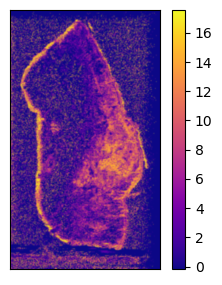

In [41]:
embedding = np.load(file='./temp/embeddings_tsne.npy')
plot_data = map_data.vector_to_array(embedding[:,1])
plot_single_variable_map(
    plot_data
)

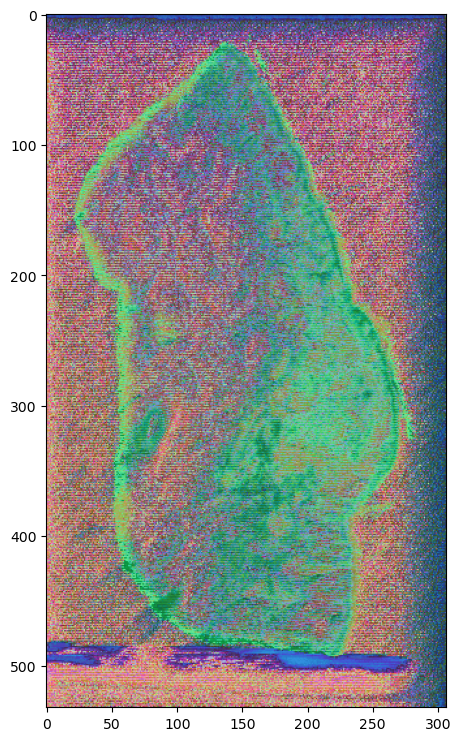

In [43]:
image_data = np.concatenate([
    map_data.vector_to_array(
        embedding[:,0]
    )[...,np.newaxis],
    map_data.vector_to_array(
        embedding[:,1]
    )[...,np.newaxis],
    map_data.vector_to_array(
        embedding[:,2]
    )[...,np.newaxis]],
    axis=2
)

image_data -= image_data.min()
image_data /= image_data.max()

plt.figure(figsize=(9,9))
plt.imshow(
    image_data
)

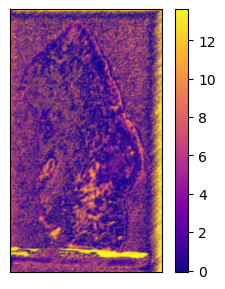

In [44]:
embedding = np.load(file='./temp/embeddings_umap.npy')
plot_data = map_data.vector_to_array(embedding[:,2])
plot_single_variable_map(
    plot_data
)

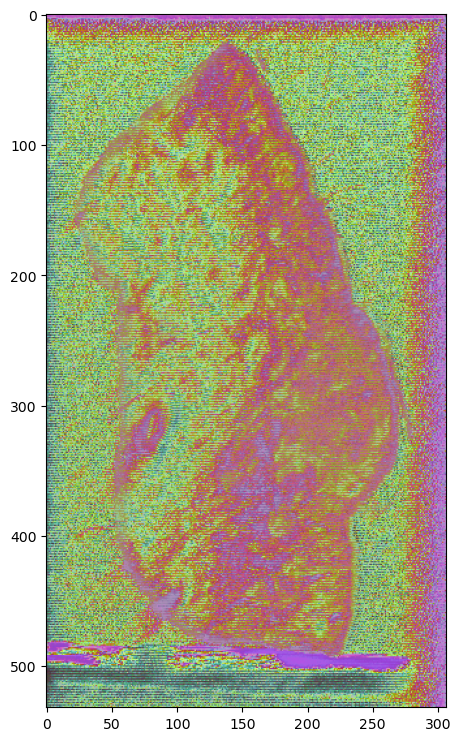

In [45]:
image_data = np.concatenate([
    map_data.vector_to_array(
        embedding[:,0]
    )[...,np.newaxis],
    map_data.vector_to_array(
        embedding[:,1]
    )[...,np.newaxis],
    map_data.vector_to_array(
        embedding[:,2]
    )[...,np.newaxis]],
    axis=2
)

image_data -= image_data.min()
image_data /= image_data.max()

plt.figure(figsize=(9,9))
plt.imshow(
    image_data
)